In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [23]:
X,Y = make_blobs(n_samples = 20000, n_features = 2, centers = 2,random_state = 100,cluster_std= 5.0)

In [24]:
print(X.shape,Y.shape)

(20000, 2) (20000,)


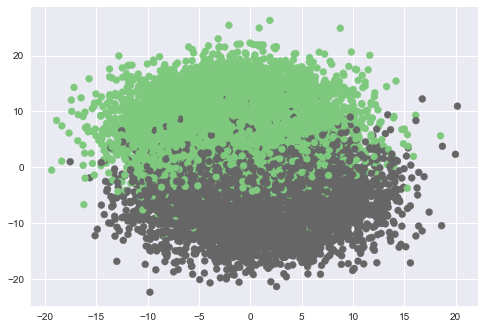

In [25]:
plt.style.use('seaborn')

plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent_r)
plt.show()

Now this data looks linearly separable.

-------

Model and Helper Functions:

In [17]:
def sigmoid(z):
    return ((1.0)/(1+np.exp(-z)))

Implement Perceptron Learning Algorithm.
- Learn the weights.
- Reduce the loss.
- Make predictions.

In [18]:
def predict(X,weights):
    """X -> m*n+1 matrix, w -> n*1 vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [19]:
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean((-Y*np.log(Y_))-((1-Y)*np.log(1-Y_)))
    return cost

In [20]:
def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dJdw = np.dot(X.T,Y_-Y)
    
    m = X.shape[0]
    
    weights = weights - learning_rate* dJdw / float(m)
    return weights

In [21]:
def train(X,Y,learning_rate = 0.5,maxEpochs = 100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%5 == 0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights

In [22]:
train(X,Y)

Epoch 0 Loss 0.0021
Epoch 5 Loss 0.0020
Epoch 10 Loss 0.0019
Epoch 15 Loss 0.0018
Epoch 20 Loss 0.0017
Epoch 25 Loss 0.0016
Epoch 30 Loss 0.0016
Epoch 35 Loss 0.0015
Epoch 40 Loss 0.0015
Epoch 45 Loss 0.0014
Epoch 50 Loss 0.0014
Epoch 55 Loss 0.0013
Epoch 60 Loss 0.0013
Epoch 65 Loss 0.0012
Epoch 70 Loss 0.0012
Epoch 75 Loss 0.0012
Epoch 80 Loss 0.0011
Epoch 85 Loss 0.0011
Epoch 90 Loss 0.0011
Epoch 95 Loss 0.0011


array([-0.06736051, -0.34076003,  1.62471923])